# Buổi 6: Thuật toán sắp xếp (phần 2)
- Merge Sort
- Quicksort

In [1]:
import matplotlib.pyplot as plt

def show_list(arr, title = ""):
    fig, ax = plt.subplots(figsize=(20, 4))
    ax.bar(range(len(arr)), arr)
    ax.set_title(title)
    ax.set_xlabel('index')
    ax.set_ylabel('value')
    ax.set_xticks(range(len(arr)))
    plt.show()



## 1. Merge Sort
Bài toán: Như các thuật toán đã học, Merge Sort (sắp xếp trộn) xử lý bài toán sắp xếp dãy bất kỳ bằng phương pháp so sánh các phần tử.

Cho một dãy gồm 0 < n < 106 số nguyên, mỗi số có giá trị trong khoảng [0,109], sắp xếp dãy trên theo thứ tự tăng dần.

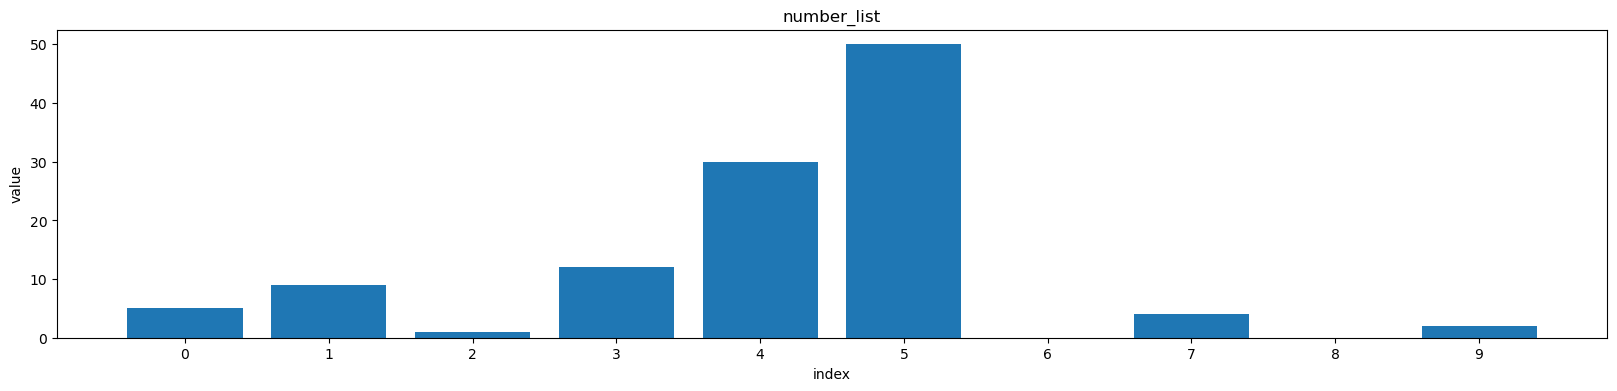

In [2]:
number_list = [5, 9, 1, 12, 30, 50, 0, 4, 0, 2]
show_list(number_list, title="number_list")

**Cách tiếp cận** của Merge Sort sử dụng phương pháp "*Chia để trị*":
1. Chia dãy cần sắp xếp thành hai phần có độ dài tương đương nhau.
2. Sắp xếp riêng từng phần
3. Nhập hai phần đã sắp xếp lại.

Ở bước 2, Thuật toán cũng dùng Merge Sort để tiếp tục sắp xếp riêng từng phần cho đến khi các phần được chia nhỏ đến kích thước bằng 1 (xem như đã được sắp xếp).

Nhờ phương pháp này, Merge Sort có độ phức tạp về thời gian là O(n.log(n)) => nhanh hơn rất nhiều so với các thuật toán ở bài học trước.

In [22]:
def merge(arr, left, right, mid):
    # Tạo bản sao hai mảng con
    arr1 = arr[left:mid] ## phải được sắp xếp xong rồi 
    arr2 = arr[mid:right] ## phải được sắp xếp xong rồi
    
    n1 = len(arr1)
    n2 = len(arr2)
    i = j = 0
    k = left

    # Hợp nhất hai mảng con
    while i < n1 and j < n2:
        if arr1[i] < arr2[j]:
            arr[k] = arr1[i]
            i += 1
        else:
            arr[k] = arr2[j]
            j += 1
        k += 1
    
    # Sao chép phần còn lại của danh sách chưa hết
    arr[k:k+n1-i] = arr1[i:n1]
    # arr[k+n1-i:k+n1-i+n2-j] = arr2[j:n2]
    k+= n1 - i
    arr[k:k+n2-j] = arr2[j:n2]


def merge_sort(arr, left, right):
    if right - left <= 1: 
        return 

    mid = (left + right) // 2
    merge_sort(arr, left, mid) ## 3
    merge_sort(arr, mid, right) ## 3
    
    merge(arr, left, right, mid)
    



Before sorting: [5, 9, 1, 12, 30, 50, 0, 4, 0, 2]
After sorting: [0, 0, 1, 2, 4, 5, 9, 12, 30, 50]


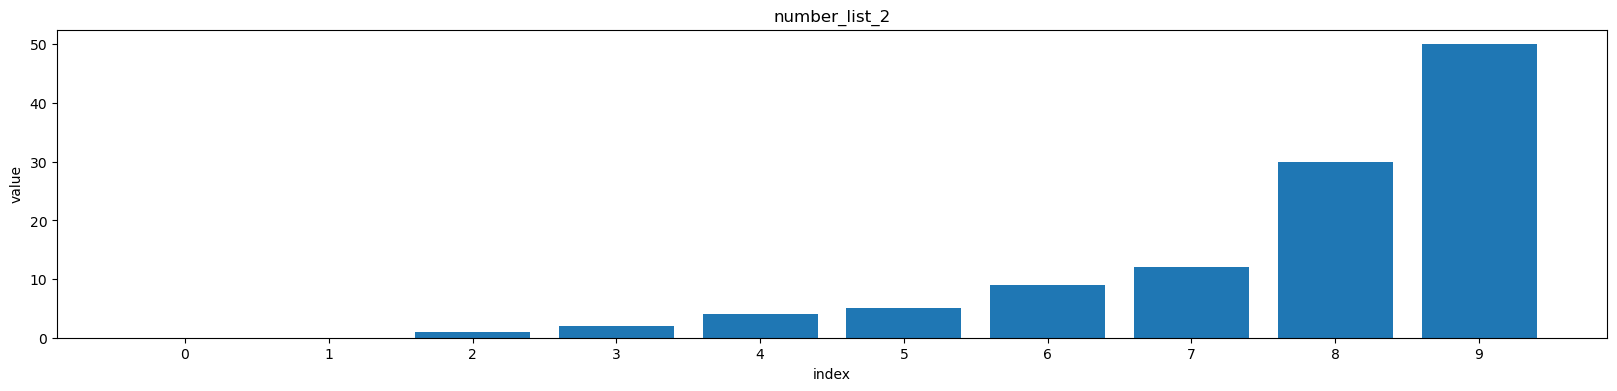

In [23]:

number_list_2 = number_list[:]

merge_sort(number_list_2, 0, len(number_list_2))

print("Before sorting: {}".format(number_list))
print("After sorting: {}".format(number_list_2))
    
show_list(number_list_2, title="number_list_2")

## Quick sort

Cách tiếp cận: cũng sử dụng phương pháp chia để trị: 
1. Chọn một phần tử trong dãy làm mốc (bất kỳ)
2. Đem tất cả các phần tử nhỏ hơn hoặc bằng mốc về phía bên trái, như vậy các phần tử lớn hơn hoặc bằng mốc nằm bên phải
3. Sắp xếp riêng từng phần bên trái và phải.

Nhận xét:
- Sau khi thực hiện xong bước 2, do tất cả phần tử bên trái để nhỏ hơn phần tử bên phải, ta không cần thực hiện bước trộn hai phần như "Merge Sort"
- Ở bước 1, ta có một số cách thông dụng để chọn mốc: 
+ Chọn phần tử đàu tiên (bên trái) 
+ Chọn phần tử cuối cùng (bên phải)
+ Chọn phần tử chính giữa
+ Chọn phần tử ngẫu nhiên

In [24]:
def partition(arr, left, right):
    pivot = arr[left] ## Mốc
    i = left
    
    for j in range(left + 1, right):
        if arr[j] < pivot: 
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    
    arr[i], arr[left] = arr[left], arr[i]
    return i